<a href="https://colab.research.google.com/github/MohdSahil8595/Logistic_Regression/blob/main/PRODIGY_ML_01ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task-01**

**Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques


house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip house-prices-advanced-regression-techniques.zip


Archive:  house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
# Fill missing values with median (or mean) for numerical columns
data['GrLivArea'] = data['GrLivArea'].fillna(data['GrLivArea'].median())
data['BedroomAbvGr'] = data['BedroomAbvGr'].fillna(data['BedroomAbvGr'].median())
data['FullBath'] = data['FullBath'].fillna(data['FullBath'].median())
data['SalePrice'] = data['SalePrice'].fillna(data['SalePrice'].median())

**Feature Selection**

In [ ]:
X_input = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y_target = data['SalePrice']


**Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_input, y_target, test_size=0.2, random_state=42
)

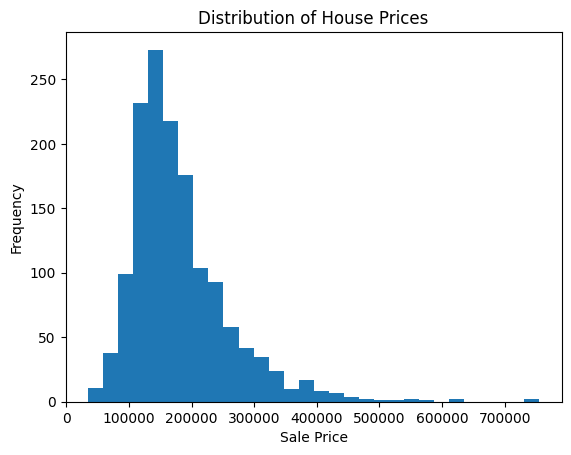

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(data['SalePrice'], bins=30)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()


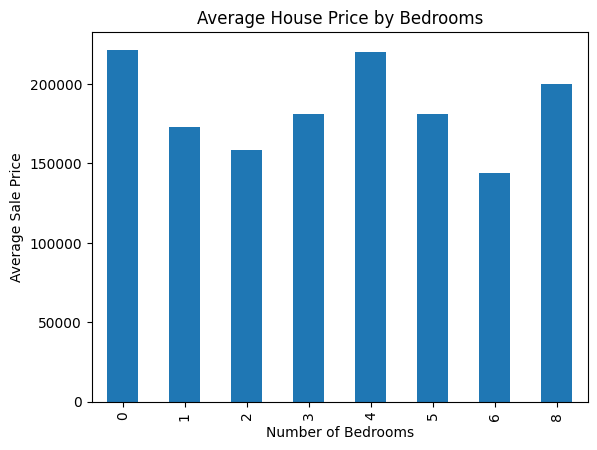

In [ ]:
avg_price_bedrooms = data.groupby('BedroomAbvGr')['SalePrice'].mean()

plt.figure()
avg_price_bedrooms.plot(kind='bar')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Sale Price')
plt.title('Average House Price by Bedrooms')
plt.show()



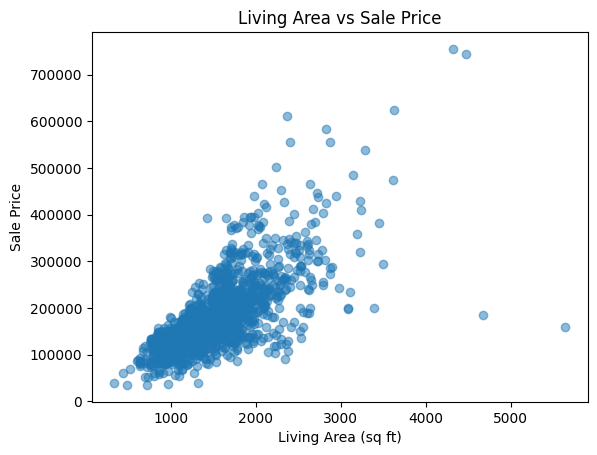

In [ ]:
plt.figure()
plt.scatter(data['GrLivArea'], data['SalePrice'], alpha=0.5)
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.title('Living Area vs Sale Price')
plt.show()

**Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

** Train Linear Rgeression**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:

# Prediction
y_pred = model.predict(X_test_scaled)

In [ ]:
# Model Evaluation

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 52975.72
R² Score: 0.63


In [ ]:
# check prediction is good or not
comparison = pd.DataFrame({
    'Actual Price': y_test.values[:5],
    'Predicted Price': y_pred[:5]
})

print(comparison)


   Actual Price  Predicted Price
0        154500    113410.672553
1        325000    305081.877759
2        115000    135904.785630
3        159000    205424.675641
4        315500    227502.683490


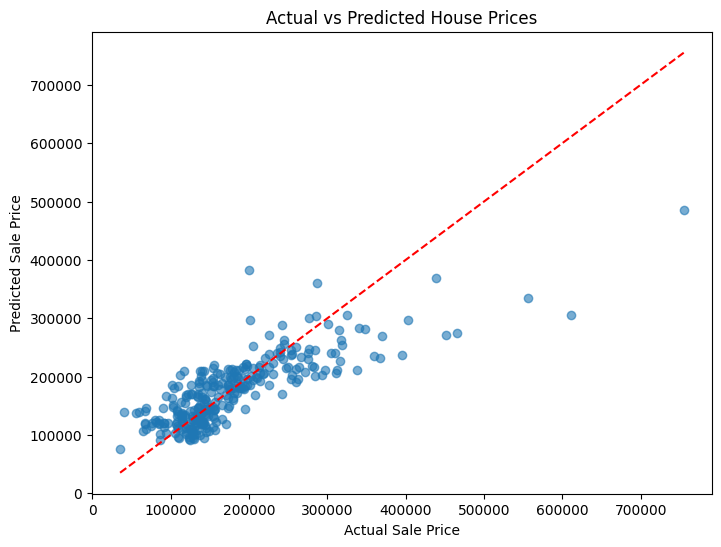

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted House Prices')
plt.show()


In [ ]:
import pandas as pd

new_house = pd.DataFrame({
    'GrLivArea': [1800],
    'BedroomAbvGr': [3],
    'FullBath': [2]
})


In [ ]:
new_house_scaled = scaler.transform(new_house)
predicted_price = model.predict(new_house_scaled)
print(f"Predicted House Price: ₹{predicted_price[0]:,.0f}")


Predicted House Price: ₹219,572
